# Materi Praktikum 

### Pada praktikum ini, kita akan membahas:
##### 1. Representasi keadaan qubit tunggal
##### 2. Gerbang kuantum qubit tunggal 
##### 3. Gerbang kuantum qubit ganda
##### 4. Daftar sintaks gerbang 1-qubit, 2-qubit, 3-qubit, dan multi-qubit
##### Contoh 1: Membangun Rangkaian Kuantum
##### Contoh 2: Membangun Rangkaian Kuantum step by step
##### Contoh 3: Rangkaian dengan keadaan awal
##### Contoh 4: Konsep Superposisi
##### Contoh 5: Konsep Entanglement
##### Contoh 6: Konsep Interferensi

# 1. Representasi Keadaan Qubit tunggal <a name="single_states"/>

Keadaan kuantum qubit tunggal dapat ditulis sebagai

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


dimana $\alpha$ and $\beta$ adalah bilangan kompleks. Dalam pengukuran kemungkinan bit berada di $\left|0\right\rangle$ adalah $|\alpha|^2$ dan $\left|1\right\rangle$ adalah $|\beta|^2$. Sebagai vektor ini adalah

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Catatan, karena konservasi probabilitas $|\alpha|^2+ |\beta|^2 = 1$ dan karena fase global tidak terdeteksi $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ kita hanya memerlukan dua bilangan riil untuk menggambarkan satu keadaan kuantum qubit.

Representasi yang nyaman adalah

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

dimana $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  Dari sini terlihat jelas bahwa terdapat korespondensi satu-satu antara status qubit. ($\mathbb{C}^2$) dan titik-titik pada permukaan bola satuan ($\mathbb{S}^2$). Ini disebut representasi bola Bloch dari keadaan qubit.

Gerbang/operasi kuantum biasanya direpresentasikan sebagai matriks. Gerbang yang bekerja pada qubit direpresentasikan oleh $2\times 2$ unitary matrix $U$. Tindakan gerbang kuantum ditemukan dengan mengalikan matriks yang mewakili gerbang dengan vektor yang mewakili keadaan kuantum.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

Sebuah kesatuan umum harus mampu mengambil $\left|0\right\rangle$ ke keadaan di atas. Itu adalah 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

dimana $a$ dan $b$ adalah bilangan kompleks yang dibatasi sedemikian rupa sehingga $U^\dagger U = I$ untuk semua $0\leq\theta\leq\pi$ dan $0\leq \phi<2\pi$. Hal ini memberikan 3 kendala dan dengan demikian $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ dan $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ dimana $0\leq \lambda<2\pi$ memberi 

$$
U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}
$$

Ini merupakan bentuk paling umum dari qubit tunggal unitary.

# 2. Gerbang kuantum Qubit Tunggal <a name="single_gates"/>

Gerbang qubit tunggal yang tersedia adalah:
- Gerbang U
- Gerbang P
- Gerbang identitas
- Gerbang Pauli (X, Y, dan Z)
- Gerbang Clifford
- Gerbang $C3$
- Gerbang rotasi standar

Kami telah menyediakan backend: `unitary_simulator` untuk memungkinkan Anda menghitung matriks unitary.

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import math

### Gerbang U 

Di Qiskit kami memberi Anda akses ke kesatuan umum menggunakan gerbang $u$, yang memiliki bentuk matriks berikut
$$
U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}
$$


In [ ]:
qc = QuantumCircuit(1)  # buat rangkaian kuantum 1-qubit
qc.u(pi/2,pi/4,pi/8,0)  # q0 diputar dengan sudut θ= pi/2, ϕ=pi/4,  dan  λ=pi/8
qc.draw('mpl')

### Gerbang P 

Gerbang $p(\lambda)= u(0, 0, \lambda)$ mempunyai bentuk matrik 

$$
p(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

yang berguna karena memungkinkan kita menerapkan fase kuantum.

In [ ]:
qc = QuantumCircuit(1)
qc.p(pi/2,0)           # q0 diputar terhadap sumbu-z sebesar pi/2
qc.draw('mpl')

### Gerbang Identitas 

Gerbang identitas adalah $Id = p(0)$.

In [ ]:
qc = QuantumCircuit(1)
qc.id(0)                # gerbang identitas diterapkan pada q0 
qc.draw('mpl')

### Gerbang Pauli

#### $X$: Gerbang Not (bit-flip) 

Gerbang bit-flip $X$ didefinisikan sebagai:
$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u(\pi,0,\pi)
$$

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)                  # gerbang X diterapkan pada q0
qc.draw('mpl')

#### Gerbang bit dan fase-flip $Y$ 

Gerbang $Y$ didefinisikan sebagai:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u(\pi,\pi/2,\pi/2)
$$

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)                 # gerbang Y diterapkan pada q0
qc.draw('mpl')

#### Gerbang pembalik fase $Z$

Gerbang pembalikan fase $Z$ didefinisikan sebagai:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=p(\pi)
$$

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)                # gerbang Z diterapkan pada q0
qc.draw('mpl')

#### Gerbang Hadamard

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u(\pi/2,0,\pi)
$$

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)                  # gerbang H diterapkan pada q0
qc.draw('mpl')

#### Gerbang $S$ (atau, fase $\sqrt{Z}$ ) 

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= p(\pi/2)
$$

In [ ]:
qc = QuantumCircuit(1)
qc.s(0)                # gerbang S diterapkan pada q0
qc.draw('mpl')

#### Gerbang $S^{\dagger}$ (atau, konjugat dari fase $\sqrt{Z}$) 

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= p(-\pi/2)
$$


In [ ]:
qc = QuantumCircuit(1)
qc.sdg(0)              # gerbang konyugat S diterapkan pada q0
qc.draw('mpl')

#### Gerbang $T$ (atau, fase $\sqrt{S}$ )

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= p(\pi/4) 
$$

In [ ]:
qc = QuantumCircuit(1)
qc.t(0)                   #gerbang T diterapkan pada q0
qc.draw('mpl')

#### Gerbang $T^{\dagger}$ (atau,konjugat dari fase $\sqrt{S}$) 

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= p(-\pi/4)
$$

In [ ]:
qc = QuantumCircuit(1)
qc.tdg(0)                 # gerbang konyugat T diterapkan pada q0
qc.draw('mpl')

### Rotasi Standar

Gerbang rotasi standar adalah gerbang yang mendefinisikan rotasi di sekitar Paulis $P=\{X,Y,Z\}$. Gerbang ini didefinisikan sebagai

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotasi di sekitar sumbu X

$$
R_x(\theta) =
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u(\theta, -\pi/2,\pi/2)
$$

In [ ]:
qc = QuantumCircuit(1)
qc.rx(pi/2,0)            # q0 diputar dengan sudut pi/2 terhadap sumbu-X
qc.draw('mpl')

#### Rotasi di sekitar sumbu Y

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u(\theta,0,0)
$$

In [ ]:
qc = QuantumCircuit(1)
qc.ry(pi/2,0)             # q0 diputar dengan sudut pi/2 terhadap sumbu-Y
qc.draw('mpl')

#### Rotasi di sekitar sumbu Z

$$
R_z(\phi) =
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv p(\phi)
$$

Perhatikan bahwa di sini kita telah menggunakan padanan karena berbeda dengan $p$ oleh fase global $e^{-i \phi/2}$.

In [ ]:
qc = QuantumCircuit(1)
qc.rz(pi/2,0)            # q0 diputar dengan sudut pi/2 terhadap sumbu-Z
qc.draw('mpl')

Perhatikan bahwa ini berbeda karena hanya fase global.

# 3. Gerbang kuantum qubit Ganda <a name="multi_gates"/>

#### Pendahuluan Matematika

Ruang komputer kuantum tumbuh secara eksponensial dengan jumlah qubit. Untuk $n$ qubit, ruang vektor kompleks memiliki dimensi $d=2^n$. Untuk menggambarkan status sistem multi-qubit, produk tensor digunakan untuk "menyatukan" operator dan vektor basis.

Mari kita mulai dengan mempertimbangkan sistem 2-qubit. Diberikan dua operator $A$ dan $B$ yang masing-masing bekerja pada satu qubit, operator gabungan $A \otimes B$ yang bekerja pada dua qubit adalah

$$\begin{equation}
A\otimes B =
\begin{pmatrix}
A_{00} \begin{pmatrix}
B_{00} & B_{01} \\
B_{10} & B_{11}
\end{pmatrix} & A_{01} \begin{pmatrix}
B_{00} & B_{01} \\
B_{10} & B_{11}
\end{pmatrix} \\
A_{10} \begin{pmatrix}
B_{00} & B_{01} \\
B_{10} & B_{11}
\end{pmatrix} & A_{11} \begin{pmatrix}
B_{00} & B_{01} \\
B_{10} & B_{11}
\end{pmatrix}
\end{pmatrix},
\end{equation}$$

di mana $A_{jk}$ dan $B_{lm}$ masing-masing adalah elemen matriks $A$ dan $B$.

Secara analog, vektor basis untuk sistem 2-qubit dibentuk menggunakan produk tensor vektor basis untuk satu qubit:
$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$

Perhatikan bahwa kami telah memperkenalkan singkatan untuk produk tensor vektor basis, di mana $\left|0\right\rangle \otimes \left|0\right\rangle$ ditulis sebagai $\left|00\right\rangle$. Keadaan sistem $n$-qubit dapat dijelaskan menggunakan produk tensor $n$-lipat dari vektor basis qubit tunggal. Perhatikan bahwa vektor basis untuk sistem 2-qubit adalah 4-dimensi; secara umum, vektor basis sistem $n$-qubit adalah $2^{n}$-dimensi, seperti yang disebutkan sebelumnya.

### Pengurutan vektor basis di Qiskit

Dalam komunitas fisika, qubit dari sistem multi-qubit biasanya diurutkan dengan qubit pertama di sisi paling kiri dari produk tensor dan qubit terakhir di sisi paling kanan. Misalnya, jika qubit pertama dalam keadaan $\left|0\right\rangle$ dan yang kedua dalam keadaan $\left|1\right\rangle$, keadaan gabungan mereka akan menjadi $\left|01\right\rangle$. Qiskit menggunakan urutan qubit yang sedikit berbeda, di mana qubit direpresentasikan dari bit paling signifikan (MSB) di sebelah kiri hingga bit paling tidak signifikan (LSB) di sebelah kanan (little-endian). Ini mirip dengan representasi bitstring pada komputer klasik, dan memungkinkan konversi mudah dari bitstring ke bilangan bulat setelah pengukuran dilakukan. Untuk contoh yang baru saja diberikan, status gabungan akan direpresentasikan sebagai $\left|10\right\rangle$. Yang penting, *perubahan dalam representasi status multi-qubit ini memengaruhi cara gerbang multi-qubit direpresentasikan dalam Qiskit*, seperti yang dibahas di bawah ini.

Representasi yang digunakan dalam Qiskit menghitung vektor basis dalam urutan bilangan bulat yang direpresentasikannya. Misalnya, vektor basis untuk sistem 2-qubit akan diurutkan sebagai $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, dan $\left|11\right\rangle$. Dengan menganggap vektor basis sebagai string bit, mereka mengodekan bilangan bulat 0,1,2 dan 3, secara berurutan.

### Operasi terkendali pada qubit

Gerbang multi-qubit umum melibatkan penerapan gerbang pada satu qubit, yang dikondisikan pada status qubit lain. Misalnya, kita mungkin ingin membalik status qubit kedua saat qubit pertama berada di $\left|0\right\rangle$. Gerbang semacam itu dikenal sebagai _gerbang terkendali_. Gerbang multi-qubit standar terdiri dari gerbang dua-qubit dan gerbang tiga-qubit. 

### Gerbang dua-qubit 
- gerbang Pauli terkendali
- gerbang Hadamard terkendali
- gerbang rotasi terkendali
- gerbang fase terkendali
- gerbang u3 terkendali
- gerbang swap

### Gerbang tiga-qubit
- gerbang Toffoli
- gerbang Fredkin

## Gerbang dua-qubit <a name="two_gates"/>

Sebagian besar gerbang dua-qubit bertipe terkendali (kecuali gerbang SWAP). Secara umum, gerbang dua-qubit terkendali $C_{U}$ bertindak untuk menerapkan kesatuan satu-qubit $U$ ke qubit kedua saat status qubit pertama berada di $\left|1\right\rangle$. Misalkan $U$ memiliki representasi matriks

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}.$$

Kita dapat menghitung aksi $C_{U}$ sebagai berikut. Ingat bahwa vektor basis untuk sistem dua qubit diurutkan sebagai $\left|00\right\rangle, \left|01\right\rangle, \left|10\right\rangle, \left|11\right\rangle$. Misalkan **qubit kontrol** adalah **qubit 0** (yang, menurut konvensi Qiskit, adalah salah satu sisi _kanan_ dari produk tensor). Jika qubit kontrol berada di $\left|1\right\rangle$, $U$ harus diterapkan ke **target** (qubit 1, di sisi _kiri_ dari produk tensor). Oleh karena itu, di bawah aksi $C_{U}$, vektor basis ditransformasikan menurut

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}.$$

Dalam bentuk matriks, aksi $C_{U}$ adalah

$$\begin{equation}
C_U = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} &0 & u_{11}
\end{pmatrix}. \end{equation}$$

Untuk mengerjakan elemen-elemen matriks ini, misalkan

$$C_{(jk), (lm)} = \left(\underset{\text{qubit}~1}{\left\langle j \right|} \otimes \underset{\text{qubit}~0}{\left\langle k \right|}\right) C_{U} \left(\underset{\text{qubit}~1}{\left| l \right\rangle} \otimes \underset{\text{qubit}~0}{\left| m \right\rangle}\right),$$

hitung aksi $C_{U}$ (diberikan di atas), dan hitung produk dalam.

Seperti yang ditunjukkan pada contoh di bawah, operasi ini diimplementasikan dalam Qiskit sebagai `cU(q[0],q[1])`.

Jika **qubit 1 adalah kontrol dan qubit 0 adalah target**, maka vektor basis ditransformasikan menurut
$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|1\right\rangle}\\
\end{align*},$$


yang menyiratkan bentuk matriks $C_{U}$ adalah
$$\begin{equation}
C_U = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{pmatrix}.
\end{equation}$$

### Gerbang Pauli Terkendali

#### Gerbang Controlled-X (atau, Controlled-NOT)
Gerbang Controlled-NOT membalik qubit `target` saat qubit kontrol berada dalam status $\left|1\right\rangle$. Jika kita mengambil MSB sebagai qubit kontrol (misalnya `cx(q[1],q[0])`), maka matriksnya akan terlihat seperti

$$
C_X =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. $$

Namun, ketika LSB adalah qubit kontrol, (misalnya `cx(q[0],q[1])`), gerbang ini setara dengan matriks berikut:

$$
C_X =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}.
$$

In [ ]:
qc = QuantumCircuit(2)         # buat rangkaian denagn 2 qubit
qc.cx(0,1)                     # Gerbang CX diterapkan, q0 = kontrol, q1 = target
qc.draw('mpl')                 # catatan: qc.cx(1,0), artinya q1 = kontrol, q0 = target

#### Gerbang $Y$ yang dikendalikan

Terapkan gerbang $Y$ ke qubit target jika qubit kontrol adalah MSB

$$
C_Y =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix},
$$

atau ketika LSB adalah kontrol

$$
C_Y =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

In [ ]:
qc = QuantumCircuit(2)
qc.cy(0,1)         # Gerbang CY diterapkan, q0 = kontrol, q1 = target
qc.draw('mpl')

#### Gerbang $Z$ terkendali (atau, Pembalikan Fase terkendali)

Demikian pula, gerbang Z terkendali membalik fase qubit target jika qubit kendali adalah $\left|1\right\rangle$. Matriksnya tampak sama terlepas dari apakah MSB atau LSB adalah qubit kendali:
$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$


In [ ]:
qc = QuantumCircuit(2)
qc.cz(0,1)              # Gerbang CZ diterapkan, q0 = kontrol, q1 = target
qc.draw('mpl')

### Gerbang Hadamard yang terkendali

Terapkan gerbang $H$ ke qubit target jika qubit kontrol adalah $\left|1\right\rangle$. Berikut ini adalah kasus di mana kontrol adalah qubit LSB.
$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 0 & 1 & 0\\
0 & \frac{1}{\sqrt{2}}  & 0& -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$

In [ ]:
qc = QuantumCircuit(2)
qc.ch(0,1)              # Gerbang CH diterapkan, q0 = kontrol, q1 = target
qc.draw('mpl')

### Gerbang rotasi terkendali

#### Rotasi terkendali di sekitar sumbu Z

Lakukan rotasi di sekitar sumbu Z pada qubit target jika qubit kontrol (di sini LSB) adalah $\left|1\right\rangle$.

$$
C_{Rz}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

In [ ]:
qc = QuantumCircuit(2)
qc.crz(pi/2,0,1)         # Gerbang CRz diterapkan, sudut putar pi/2, q0 = kontrol, dan q1 = target
qc.draw('mpl')

### Rotasi fase terkendali

Lakukan rotasi fase jika kedua qubit berada dalam status $\left|11\right\rangle$. Matriks tampak sama terlepas dari apakah MSB atau LSB adalah qubit kontrol.
$$
C_{p}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

In [ ]:
qc = QuantumCircuit(2)
qc.cp(pi/2,0,1)           # Gerbang CP diterapkan, sudut putar pi/2, q0 = kontrol, dan q1 = target
qc.draw('mpl')

### Rotasi $u$ terkendali

Lakukan rotasi $u$ terkendali pada qubit target jika qubit kontrol (di sini LSB) adalah $\left|1\right\rangle$.
$$
C_{u}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

In [ ]:
qc = QuantumCircuit(2)
qc.cu(pi/2, pi/4, pi/8, 0, 0,1) # Gerbang CU diterapkan, sudut θ= pi/2, ϕ=pi/4,  dan  λ=pi/8, q0 = kontrol, dan q1 = target
qc.draw('mpl')

### Gerbang SWAP

Gerbang SWAP menukar dua qubit. Ia mengubah vektor basis sebagai

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

yang memberikan representasi matriks dalam bentuk

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

In [ ]:
qc = QuantumCircuit(2)
qc.swap(0,1)              # kuantum state q0 ditukar dengan kuantum state q1
qc.draw('mpl')

## Gerbang tiga-qubit <a name="three_gates"/>

Ada dua gerbang tiga-qubit yang umum digunakan. Untuk tiga qubit, vektor basis diurutkan sebagai berikut

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

yang, sebagai bitstring, mewakili bilangan bulat $0,1,2,\cdots, 7$. Sekali lagi, Qiskit menggunakan representasi di mana qubit pertama berada di sisi paling kanan dari produk tensor dan qubit ketiga berada di sisi paling kiri:
$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Gerbang Toffoli (gerbang $CCX$)

[Gerbang Toffoli](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) membalik qubit ketiga jika dua qubit pertama (LSB) keduanya adalah $\left|1\right\rangle$:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

Dalam bentuk matriks, gerbang Toffoli adalah
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

In [ ]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)          # gerbang CCX diterapkan dengan q0 = q1 = kontrol, sedangkan q2 = target
qc.draw('mpl')

### Gerbang swap terkendali (Gerbang Fredkin)

[Gerbang Fredkin](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate), atau *gerbang swap terkendali*, menukar qubit kedua dan ketiga jika qubit pertama (LSB) adalah $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

Dalam bentuk matriks, gerbang Fredkin adalah

$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

In [ ]:
qc = QuantumCircuit(3)
qc.cswap(0,1,2) # gerbang CSWAP diterapkan dengan q0 = kontrol, kuantum state q1 dan q2 ditukar  
qc.draw('mpl')

# 4. Ringkasan gerbang qubit tunggal dan qubit ganda

In [ ]:
qc = QuantumCircuit(4)        # Buat rangkaian kuantum dengan 4 qubit: q3, q2, q1, q0

# Gerbang 1-qubit
qc.h(0)                       # Terapkan gerbang H pada q0
qc.x(1)                       # Terapkan gerbang X pada q1
qc.y(2)                       # Terapkan gerbang Y pada q2
qc.z(3)                       # Terapkan gerbang Z pada q3

qc.s(0)                       # gerbang S diterapkan pada q0
qc.sdg(1)                     # gerbang konyugat S diterapkan pada q0
qc.t(2)                       # gerbang T diterapkan pada q0
qc.tdg(3)                     # gerbang konyugat T diterapkan pada q0

qc.barrier()                  # Beri batas (tidak diproses)
qc.u(pi/2,pi/4,pi/8,0)        # terapkan gerbang U, q0 diputar dengan sudut θ= pi/2, ϕ=pi/4,  dan  λ=pi/8
qc.p(math.pi/2,0)             # Terapkan gerbang phase pada q0, nilai parameter pi/2 
qc.rx(math.pi/4,1)            # Rotasi thd sb-x  pada q1, nilai parameter pi/4
qc.ry(math.pi/8,2)            # Rotasi thd sb-y  pada q2, nilai parameter pi/8
qc.rz(math.pi/5,3)            # Rotasi thd sb-z  pada q3, nilai parameter pi/5
qc.barrier()                  # Beri batas (tidak diproses)


# Gerbang 2-qubit
qc.swap(0,1)                  # kuantum state q0 ditukar dengan kuantum state q1 
qc.cx(2,3)                    # Gerbang kontrol-X/CNOT, q2 = kontrol, q3 = target
qc.cy(2,0)                    # Gerbang kontrol-Y, q2 sebagai kontrol, q0 sebagai target
qc.cz(3,1)                    # Gerbang kontrol-Z, q3 sebagai kontrol, q1 sebagai target
qc.ch(3,0)                    # Gerbang kontrol-H, q3 = kontrol, q0 = target
qc.crx(math.pi/2,0,3)         # Gerbang kontrol-Rx, q0 sebagai kontrol, q3 sebagai target, nilai parameter pi/2
qc.cry(math.pi/8,2,1)         # Gerbang kontrol-Ry, q2 sebagai kontrol, q1 sebagai target, nilai parameter pi/8
qc.crz(math.pi/4,1,3)         # Gerbang kontrol-Rz, q1 sebagai kontrol, q3 sebagai target, nilai parameter pi/4
qc.barrier()                  # Beri batas (tidak diproses)

# Gerbang 3-qubit atau lebih
qc.ccx(0,1,2)                 # Gerbang Kontrol-kontrol-X, q0 dan q1 sebagai kontrol, q2 sebagai target
qc.cswap(0,2,3)               # Gerbang kontrol-Swap, q0 sebagai kontrol, nilai q2 ditukardenagn nilai q3
qc.mcp(math.pi/4, [0,1,2],3)  # Gerbang Multi kontrol phase, [0,1,2] sebagai kontrol, q3 sebagai target
qc.mcx([0,1,2],3)             # Gerbang Multi kontrol-X, [0,1,2] sebagai kontrol, q3 sebagai target
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

# CONTOH 1: Membangun Rangkaian Kuantum 
#### Langkah-langkah untuk membangun rangkaian kuantum menggunakan Qiskit
1. Memanggil Library yang Dibutuhkan
2. Membangun Rangkaian Kuantum (Quantum Circuit)
3. Menambahkan Gerbang Kuantum (Quantum Gates)
4. Mengukur Qubit (Measurement)
5. Menjalankan Rangkaian Kuantum di komputer lokal
6. Mengambil dan menampilkan hasil eksperimen di layar
7. Mem-Visualisasikan hasil eksperimen di layar                                  

### 1. Memanggil Library yang Dibutuhkan

In [3]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### 2. Membangun Rangkaian kuantum 3 qubit

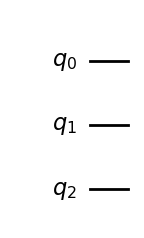

In [4]:
qc = QuantumCircuit(3)   # susunan qubit: q2 q1 q0
# Menggambar rangkaian di layar
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar


### 3. Menambahkan gerbang kuantum untuk mengubah-ubah keadaan qubit 

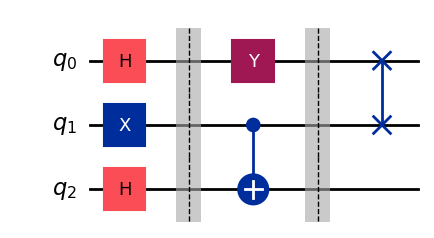

In [5]:
qc.h(0)           # menambahkan gerbang X pada qubit ke-0 (q0)
qc.x(1)           # menambahkan gerbang H pada qubit ke-1 (q1)
qc.h(2)           # menambahkan gerbang Y pada qubit ke-2 (q2)
qc.barrier()
qc.y(0)
qc.cx(1,2)
qc.barrier()
qc.swap(0,1)
# Menggambar rangkaian di layar
qc.draw('mpl')     # Tampilkan gambar sirkuit di layar

In [6]:
# menampilkan keadaan kuantum di layar 
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

Perhatikan bahwa: probabilitas untuk mendapatkan keadaan
- |001> = 1/4
- |011> = 1/4
- |101> = 1/4
- |111> = 1/4

### 4. Mengukur qubit

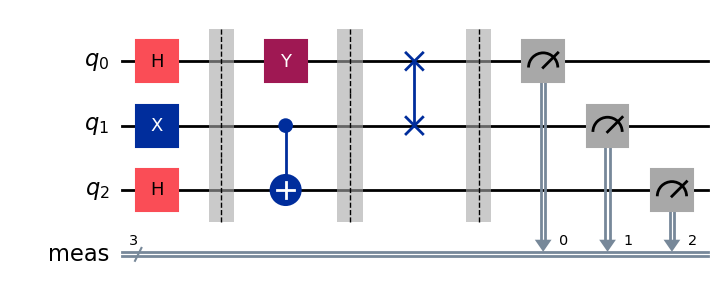

In [7]:
qc.measure_all()
# Menggambar rangkaian di layar
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

### 5.Menjalankan rangkaian Kuantum di komputer lokal

In [8]:
backend = AerSimulator()

# transpilasi rangkaian kuantum ke instruksi QASM tingkat rendah 
qc_compiled = transpile(qc, backend)

# Jalankan rangkaian pada simulator qasm. pengukuran dilakukan 100 kali
job = backend.run(qc_compiled, shots=100)  

# Raih hasil dari pekerjaan tersebut
result = job.result()

### 6. Mengambil dan menampilkan hasil eksperimen di layar

In [9]:
count = result.get_counts()            # mengambil hasil pengukuran
print(count)                           # cetak di layar

{'101': 22, '001': 29, '111': 20, '011': 29}


In [ ]:
Artinya: setelah dilakukan pengukuran
- keadaan qubit |101> runtuh menjadi bit klasik 101 
- keadaan qubit |001> runtuh menjadi bit klasik 001
- keadaan qubit |111> runtuh menjadi bit klasik 111
- keadaan qubit |011> runtuh menjadi bit klasik 011

### 7.Mem-Visualisasikan hasil eksperimen di layar

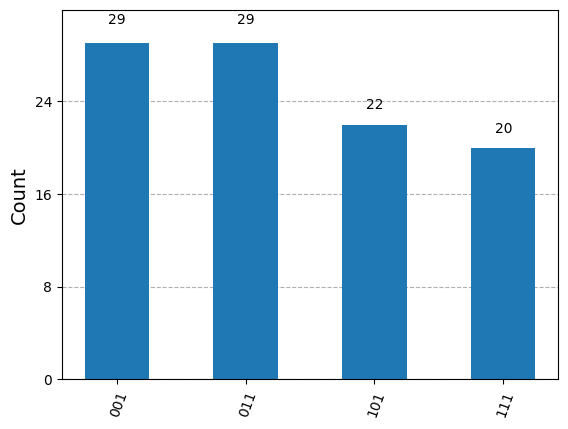

In [11]:
plot_histogram(count)

#### Histogram adalah grafik yang menampilkan frekuensi dari tiap-tiap keadaan

In [14]:
print('pengukuran dilakukan 100 kali')
print('secara teori keadaan |001> muncul 25 kali (1/4*100)') 
print('tetapi prakteknya keadaan |001> muncul', count['001'], 'kali') 

pengukuran dilakukan 100 kali
secara teori keadaan |001> muncul 25 kali (1/4*100)
tetapi prakteknya keadaan |001> muncul 29 kali


## CONTOH 2: Membangun Rangkaian Kuantum Step by Step

### 1. Memanggil Library yang Dibutuhkan

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### 2.Membangun Rangkaian Kuantum

In [ ]:
# Membangun Rangkaian Kuantum yang bekerja pada register kuantum tiga qubit
qc = QuantumCircuit(3)   # susunan qubit: q2 q1 q0
qc.draw('mpl')           # menampilkan gambar rangkaian di layar

In [ ]:
# menampilkan keadaan awal di layar 
psi=Statevector(qc)
psi.draw('latex')

- Perhatikan bahwa, secara default keadaan awal kuantum |q2 q1 q0> =|000>

In [ ]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

In [ ]:
# Visualisasi keadaan qubit dalam bentuk Bola Bloch
plot_bloch_multivector(psi)

- Perhatikan bahwa qubit q0, q1, dan q2, semuanya mengarah ke atas

### 3. Menambahkan Gerbang Kuantum 

In [ ]:
qc.x(0)           # menambahkan gerbang X pada qubit ke-0 (q0)
qc.h(1)           # menambahkan gerbang H pada qubit ke-1 (q1)
qc.y(2)           # menambahkan gerbang Y pada qubit ke-2 (q2)
qc.draw('mpl')    # menampilkan gambar rangkaian di layar

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

- Probabilitas mendapatkan keadaan kuantum |101> = [akar(2)/2]^2 = 1/2
- Probabilitas mendapatkan keadaan kuantum |111> = [akar(2)/2]^2 = 1/2
- Jumlah probabilitas seluruhnya = 1/2 + 1/2 = 1

In [ ]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

- Perhaikan bahwa, setelah menerapkan gerbang kuantum, Ada dua state, |101> dan |111>

In [ ]:
# menampilkan keadaan qubit dalam bentuk Bola Bloch
plot_bloch_multivector(psi)

Perhatikan bahwa, 
- arah q0 kebawah karena memiliki kuantum state |1>, 
- arah q1 searah dengan sumbu-x,   psi = 1/sqrt(2) [|0> + |1>]
- q2 arahnya kebawah memiliki kuantum state |1>

### 4. Pengukuran Qubit (Measurement)

In [ ]:
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

### 5. Menjalankan Sirkuit Kuantum di komputer lokal

In [ ]:
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024) #pengukuran dilakukan 1024 kali
result = job.result()

### 6. Mendapatkan dan Menampilkan Hasil

In [ ]:
count = result.get_counts()            # mengambil hasil pengukuran
print(count)                           # cetak di layar

# 7. Visualisasikan menggunakan Histogram

In [ ]:
plot_histogram(count)

In [ ]:
print('pengukuran dilakukan 1024 kali')
print('probabilitas mendapatkan keadaan |101> = 1/2, tetapi keadaan |101> muncul', count['101'], 'kali') 
print('probabilitas mendapatkan keadaan |111> = 1/2, tetapi keadaan |111>muncul', count['111'], 'kali') 

# CONTOH 3: Rangkaian dengan keadaan awal 

## Inisialisasi sembarang <a name="initialization"/>
Bagaimana jika kita ingin menginisialisasi register qubit ke status sembarang? Status sembarang untuk $n$ qubit dapat ditentukan oleh vektor $2^n$ amplitudo, di mana jumlah kuadrat norma amplitudo sama dengan 1. Misalnya, status tiga qubit berikut dapat disiapkan:
$$\left|\psi\right\rangle = \frac{i}{4}\left|000\right\rangle + \frac{1}{\sqrt{8}}\left|001\right\rangle + \frac{1+i}{4}\left|010\right\rangle + \frac{1+2i}{\sqrt{8}}\left|101\right\rangle + \frac{1}{4}\left|110\right\rangle$$

In [ ]:
# Inisialisasi kuantum state 3-qubit 
import math
keadaan_awal = [
    1 / math.sqrt(16) * complex(0, 1),    # z = 0 + i
    1 / math.sqrt(8) * complex(1, 0),     # z = 1 + 0.i
    1 / math.sqrt(16) * complex(1, 1),    # z = 1 + i
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),     # z = 1 + 2i
    1 / math.sqrt(16) * complex(1, 0),    # z = 1 + 0.i
    0]

qc = QuantumCircuit(3)
qc.initialize(keadaan_awal, [0,1,2])  # keadaan awal diterapkan pada q0, q1, q2
qc.draw('mpl')

In [ ]:
# menampilkan keadaan awal:
psi=Statevector(qc)
psi.draw('latex')

In [ ]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

##### penerapan berbagai gerbang kuantum

In [ ]:
qc.barrier()
qc.h(0)
qc.x(1)
qc.y(2)
qc.barrier()
qc.ccx(2,1,0)
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

In [ ]:
# menampilkan keadaan kuantum setelah berbagai gerbang diterapkan
psi=Statevector(qc)
psi.draw('latex')

In [ ]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

In [ ]:
# Pengukuran seluruh qubit
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

In [ ]:
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()

count = result.get_counts()            # mengambil hasil pengukuran
print(count)                           # cetak di layar

In [ ]:
plot_histogram(count)

# CONTOH 4: Konsep Superposisi

In [ ]:
qc = QuantumCircuit(4)        # Buat rangkaian kuantum dengan 4 qubit: q3, q2, q1, q0
qc.h(0)                       # q0 mengalami superposisi
qc.draw('mpl')

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

- Perhatikan bahwa keadaan kuantum q3,q2,q1 = 000, sedangkan keadaan kuantum q0 = 0 dan 1 

# CONTOH 5: Konsep Entanglement

In [ ]:
qc = QuantumCircuit(2)        # Buat sirkuit kuantum dengan 4 qubit: q2, q1, q0
qc.h(0)
qc.cx(0,1)

qc.draw('mpl')  

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

###### Perhatikan suku pertama, bila q0 = 0 maka q1 = 0, dan suku kedua bila q0 = 1, maka q1 = 1

###### hal ini bisa juga terjadi dengan kondisi berikut:
- |00> + |11>
- |01> + |10>
- |00> - |11>
- |01> - |10>

# CONTOH 6: Konsep Interferensi

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [ ]:
# Inisialisasi kuantum state 3-qubit 
import math
keadaan_awal = [
    1 / math.sqrt(16) * complex(0, 1),    # z = 0 + i
    1 / math.sqrt(8) * complex(1, 0),     # z = 1 + 0.i
    1 / math.sqrt(16) * complex(1, 1),    # z = 1 + i
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),     # z = 1 + 2i
    1 / math.sqrt(16) * complex(1, 0),    # z = 1 + 0.i
    0]

qc = QuantumCircuit(3)                # buat rangkaian terdiri dari 3-qubit
qc.initialize(keadaan_awal, [0,1,2])  # keadaan awal diterapkan pada q0, q1, q2
qc.draw('mpl')

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

In [ ]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

#### Perhatikan, pada keadaan awal, hanya ada 5 keadaan kuantum, yaitu: |000>, |001>,|010>,|101>,|110>
- amplitudo masing-masing keadaan kuantum adalah
- Amplitudo Keadaan kuantum |000> adalah i/4
- Amplitudo Keadaan kuantum |001> adalah akar(2)/4
- Amplitudo Keadaan kuantum |010> adalah (1+i)/4
- Amplitudo Keadaan kuantum |101> adalah [akar(2)/4 + akar(2)i/2]
- Amplitudo Keadaan kuantum |110> adalah 1/4

#### Sekarang berbagai gerbang diterapkan pada rangkaian

In [ ]:
qc.barrier()
qc.h(0)
qc.x(1)
qc.y(2)
qc.barrier()
qc.ccx(2,1,0)
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

In [ ]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

In [ ]:
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar


In [ ]:
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
count = result.get_counts()            # mengambil hasil pengukuran
plot_histogram(count)

#### Setelah berbagai gerbang diterapkan, keadaan kuantumnya menjadi 8, 
- yaitu:|000>, |001>,|010>,|011>,|100>,|101>,|110>, dan |111>
- ini menandakan amplitudo dari qubit q0,q1, dan q2 saling berinterferensi  
- bisa juga diartikan, telah terjadi interferensi antar keadaan kuantum

- Keadaan kuantum |010> dan |011> mempunyai frekuensi terbesar, menandakan adanya interferensi konstruktif (saling menguatkan)